In [220]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

In [221]:
df = pd.read_csv('admissao.csv')
df.head()

,Exame1,Exame2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

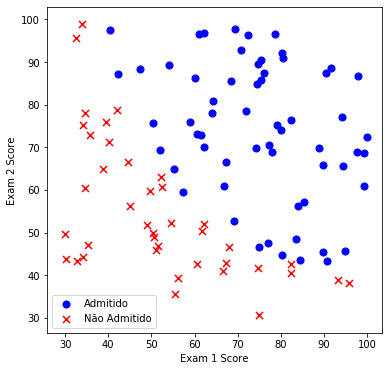

In [222]:
positive = df[df['Admitido'].isin([1])]  
negative = df[df['Admitido'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['Exame1'], positive['Exame2'], s=50, c='b', marker='o', label='Admitido')  
ax.scatter(negative['Exame1'], negative['Exame2'], s=50, c='r', marker='x', label='Não Admitido')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

In [223]:
# set X (training data) and y (target variable)
n_features = len(df.columns)-1 

x = np.array(df.drop('Admitido',1)) 
y = df.iloc[:,n_features:n_features+1].values

In [224]:
mean = x.mean(axis=0)
std = x.std(axis=0)

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [226]:
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X),axis=1)

In [227]:
w = np.random.rand(1,n_features+1)
w

array([[0.79821997, 0.66390541, 0.29613754]])

In [228]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

Text(0.5, 1.0, 'Sigmoid Function')

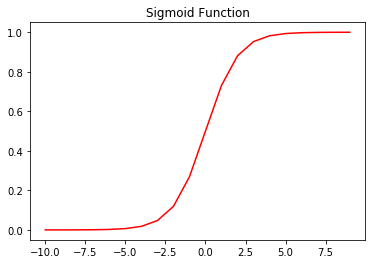

In [249]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(6,4))  
ax.plot(nums, sigmoid(nums), 'r')
ax.set_title('Sigmoid Function')

In [230]:
def binary_cross_entropy(w, x, y):    
    n = len(x)
    part1 = np.multiply(-y, np.log(sigmoid(x @ w.T)))
    part2 = np.multiply((1 - y), np.log(1 - sigmoid(x @ w.T)))
    sum_ = np.sum(part1 - part2)
    return sum_/n

In [231]:
def gradient_descent(w,x,y,alpha,epoch):
    cost = np.zeros(epoch)
    for i in range(epoch):
        w = w - (alpha/len(x)) * np.sum((sigmoid(X @ w.T) - y)*x, axis=0)
        cost[i] = binary_cross_entropy(w, x, y)
    
    return w,cost

In [232]:
x = insert_ones(x)

In [233]:
alpha=0.01
interations = 10000

In [234]:
w, cost = gradient_descent(w, x, y, alpha, interations)

Text(0.5, 1.0, 'Erro vs. Epoch')

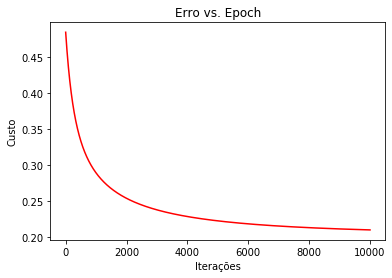

In [235]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Interations')  
ax.set_ylabel('Cost')
ax.set_title('Error vs. Interations')

In [236]:
w

array([[1.28350326, 3.07408043, 2.83741201]])

In [237]:
def predict(w, x, threshold=0.5):
    p = sigmoid(x @ w.T) >= threshold
    return (p.astype('int'))

In [238]:
student1 = np.array([[45,85]])
student1 = (student1 - mean)/std
student1 = insert_ones(student1)

In [239]:
# Probability
sigmoid(student1@ w.T)

array([[0.70832855]])

In [240]:
## Prediction
predict(w, student1)

array([[1]])

In [241]:
student2 = np.array([[90, 90]])
student2 = (student2 - mean)/std
student2 = insert_ones(student2)

In [242]:
sigmoid(student2 @ w.T)

array([[0.99984924]])

In [243]:
predict(w, student2 )

array([[1]])

In [244]:
student3 = np.array([[45, 45]])
student3 = (student3 - mean)/std
student3 = insert_ones(student3)

In [245]:
sigmoid(student3 @ w.T)

array([[0.0052144]])

In [246]:
predict(w, student3)

array([[0]])

In [247]:
student4 = np.array([[62, 62]])
student4 = (student4 - mean)/std
student4 = insert_ones(student4)

In [248]:
sigmoid(estudante4 @ w.T)

array([[0.51423642]])